# Resolución numérica de la ecuación de Lindblad para oscilaciones de Rabi con y sin interacción con el entorno

En este notebook vamos a ver cómo resolver numéricamente la ecuación de Lindblad para un sistema de un qubit sujeto a oscilaciones de Rabi cuando el qubit está aislado y cuando interactúa con el entorno.

Esto puede ser un punto de partida para probar el formalismo de quantum jumps y para entender y mostrar los procesos de decoherencia.



## Oscilaciones de Rabi

Podemos imaginar un sistema cuántico de dos niveles (qubit) interaccionando con un campo eléctrico externo que oscila con una frecuencia $\omega$.

En la Rotating Wave Approximation, podemos escribir el Hamiltoniano como:

\begin{equation}
H' = \frac{\hbar \Delta_q}{2} \sigma^z + \frac{\hbar \Omega}{2} \big( \sigma^+ + \sigma^- \big)
\end{equation}

donde

\begin{equation}
  \sigma^+ = |1\rangle\langle 0 | = \begin{bmatrix}
  0 & 0 \\
  1 & 0
  \end{bmatrix}, \quad \sigma^- = |0\rangle\langle 1 | = \begin{bmatrix}
  0 & 1 \\
  0 & 0
  \end{bmatrix}
\end{equation}

Esto nos dará, en función de los valores de $\Delta_q$ y $\Omega$, la dinámica del sistema sin decoherencia. Al calcular la probabilidad de ocupación del estado fundamental ($|0\rangle$) o del estado excitado ($|1\rangle$) podemos ver oscilaciones que se conocen como oscilaciones de Rabi, cuando la frecuencia del campo incidente es similar a la frecuencia que separa los dos niveles.

### Interacción con el entorno

En esta aproximación, se puede añadir el efecto de la interacción con el entorno añadiendo a la dinámica dos operadores

\begin{equation}
  L_1 = \sigma^z, \quad L_2 = \sigma^-
\end{equation}

Estos dos operadores representan dos procesos posibles de decoherencia.

Al tener en cuenta estos procesos en la dinámica del sistema, vemos que las oscilaciones de Rabi se amortiguan en el tiempo hasta que desaparecen.

## Lindblad Equation

Para simular tanto la dinámica sin decoherencia como con decoherencia, podemos utilizar la ecuación de Lindblad

\begin{equation}
  \frac{d}{dt} \rho(t) = -\frac{i}{\hbar} \big[ H, \rho(t) \big] + \sum_k \left( L_k \rho(t)L^\dagger_k - \frac{1}{2} \big\{\ L^\dagger_k L_k, \rho(t) \big\} \right)
\end{equation}

En el caso sin decoherencia, los operadores $L_k$ serán cero.

Podemos utilizar un método numérico estándar, como el método de Euler, para, a partir de un operador densidad inicial, obtener la evolución en función del tiempo de este operador densidad.

### Método de Euler

El método de Euler está basado en:

\begin{equation}
\frac{d B(t)}{dt} = D(t) \quad \rightarrow \quad \frac{B(t+\delta t) - B(t)}{\delta t} = D(t) \quad \rightarrow \quad B(t+\delta t) = B(t) + D(t)\delta t
\end{equation}

### Evolución sin decoherencia

Al resolver la Ecuación de Lindblad con $L_k=0$ y elegir los valores de $\Delta_q$ y $\Omega$ de forma que la oscilación se encuentre en resonancia, podemos representar los valores de la ocupación del estado excitado en función del tiempo como aparece en la siguiente gráfica. El estado inicial se ha tomado el estado fundamental.

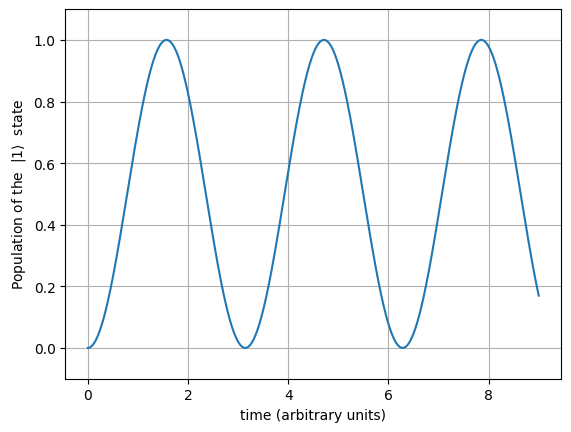

In [14]:
plt.figure()
plt.plot(evol_time, populations_uno)
plt.ylabel(r'Population of the  $|1\rangle$  state')
plt.xlabel('time (arbitrary units)')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

### Evolución con decoherencia

Al considerar no nulos los valores de $L_k$, y elegir un determinado valor de $\gamma$, vemos que las oscilaciones de Rabi que aparecían en la gráfica anterior se amortiguan en el tiempo hasta desaparecer.

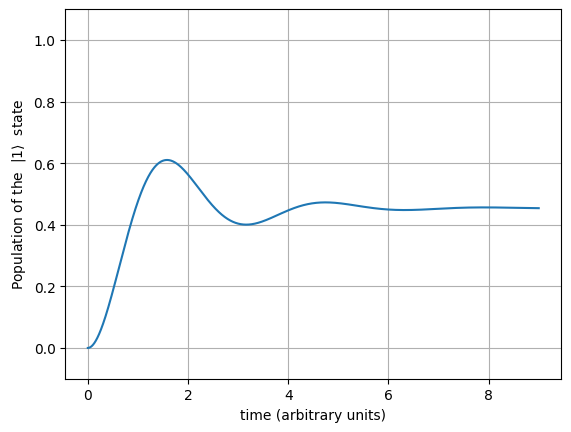

In [19]:
plt.figure()
plt.plot(evol_time, populations_uno)
plt.ylabel(r'Population of the  $|1\rangle$  state')
plt.xlabel('time (arbitrary units)')
plt.grid()
plt.ylim(-0.1, 1.1)
plt.show()

## Siguientes pasos

Una vez que se ha implementado una solución numérica de la ecuación de Lindblad y hemos comprobado el efecto que los distintos parámetros tienen sobre la evolución del operador densidad, podemos obtener esta misma evolución utilizando el formalismo de QUantum Jumps. La diferencia entre una solución y otra es que, en este enfoque, estamos calculando la evolución promedio del conjunto de estados cuánticos (calculando la evolución de $\rho$), por lo que no se entiende bién qué ocurre con un estado cuántico indivicual cuando el sistema interactúa con el entorno.

Si pudiésemos obtener la solución mediante Quantum Jumps, veríamos el efecto que tiene la decoherencia sobre cada estado cuántico individual, y finalmente obtendríamos el mismo resultado promediando sobre todos los estados cuánticos considerados.